# Area Plots, Histograms, and Bar Plots

## Exploring Datasets with pandas and Matplotlib

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this notebook, we will focus on the Canadian Immigration data.

## Downloading and Prepping Data

In [1]:
!mamba install openpyxl==3.0.9 -qy

'mamba' is not recognized as an internal or external command,
operable program or batch file.


Import Primary Modules. The first thing we'll do is import two key data analysis modules: pandas and numpy.

In [2]:
import pandas as pd
import numpy as np

Download the Canadian Immigration dataset and read it into a pandas dataframe.

In [3]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.

In [4]:
df.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Let's take a look at last five items in our dataset.

In [5]:
df.tail(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


Let's find out how many entries are there in our dataset.

In [6]:
print(df.shape)

(195, 43)


We will make some modifications to the original dataset to make it into a pandas dataframe.

#### 1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

In [7]:
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head(5)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Notice how the columns Type, Coverage, AREA, REG and DEV got removed from the dataframe.

#### 2. Rename some of the columns so that they make sense.

In [8]:
df.rename(columns={'OdName': 'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Notice ho the column names now make much more sense, even to an outsider.

#### 3. For consistency, ensure that all column labels of type string.

In [10]:
all(isinstance(column,str) for column in df.columns)

False

Notice how the above line of code returned False when we tested if all the column labels are of type string. So, let's change them all to string type.

In [11]:
df.columns= list(map(str, df.columns))

In [12]:
all(isinstance(column,str) for column in df.columns)

True

#### 4. Set the country name as index - useful for quickly looking up countries using .loc method.

In [13]:
df.set_index('Country', inplace=True)

In [14]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Notice now the country names now serve as indices.

#### 5. Add total column

In [15]:
df['Total'] = df.sum(axis=1)
df.head()

<ipython-input-15-c00bef05511f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Now the dataframe has an extra column that presents the total number of immigrants from each country in the dataset from 1980-2013. So, if we print the dimension of the data, we get

In [16]:
print("Data Dimension:", df.shape)

Data Dimension: (195, 38)


So, now our column has 38 columns instead of 37 columns that we had before.

In [19]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data

years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## Visualizing Data using Matplotlib

Importing matplotlib library

In [20]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #for ggplot like style

# Area Plots

In [25]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter stacked to value False.

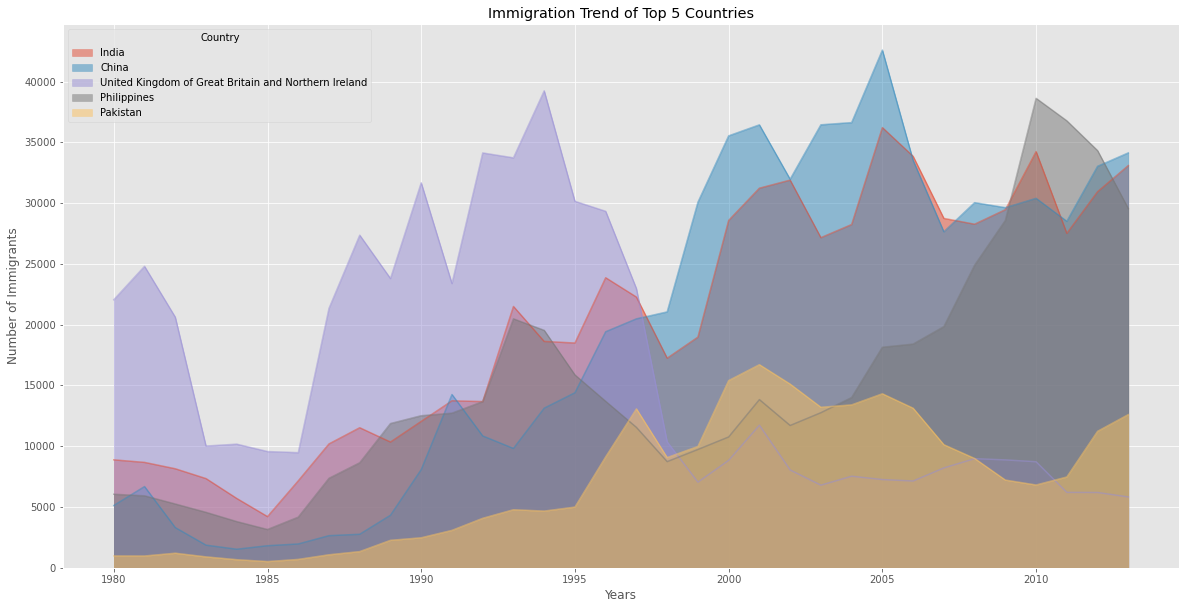

In [26]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

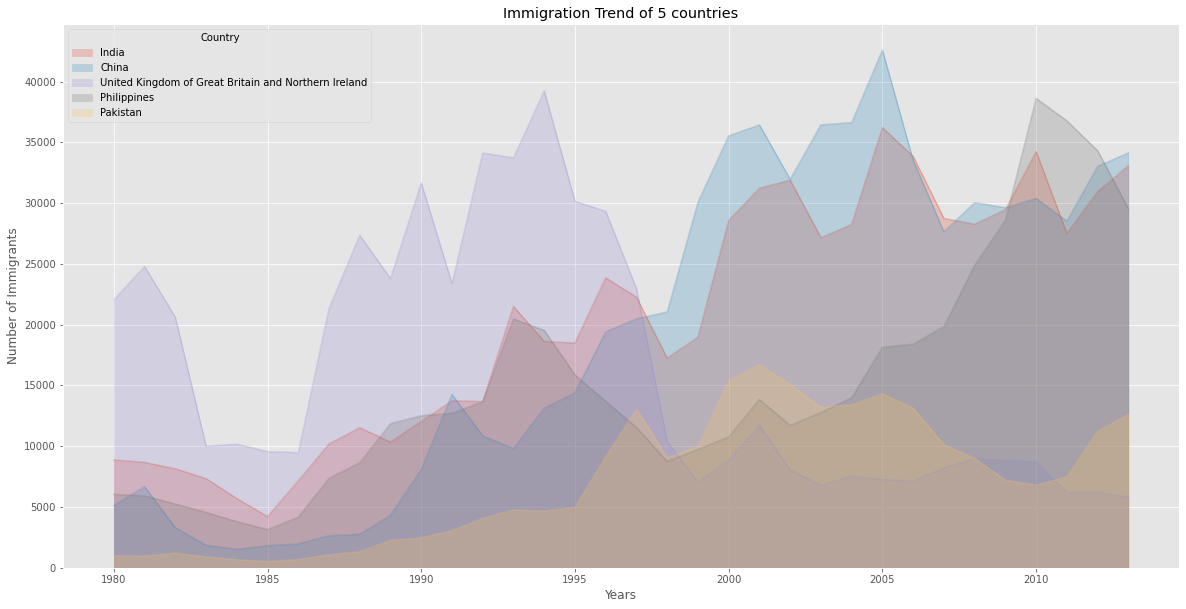

In [28]:
df_top5.plot(kind='area',
            alpha=0.25, #0-1, default alpha=0.5
            stacked=False,
            figsize=(20,10))

plt.title('Immigration Trend of 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Text(0.5, 0, 'Years')

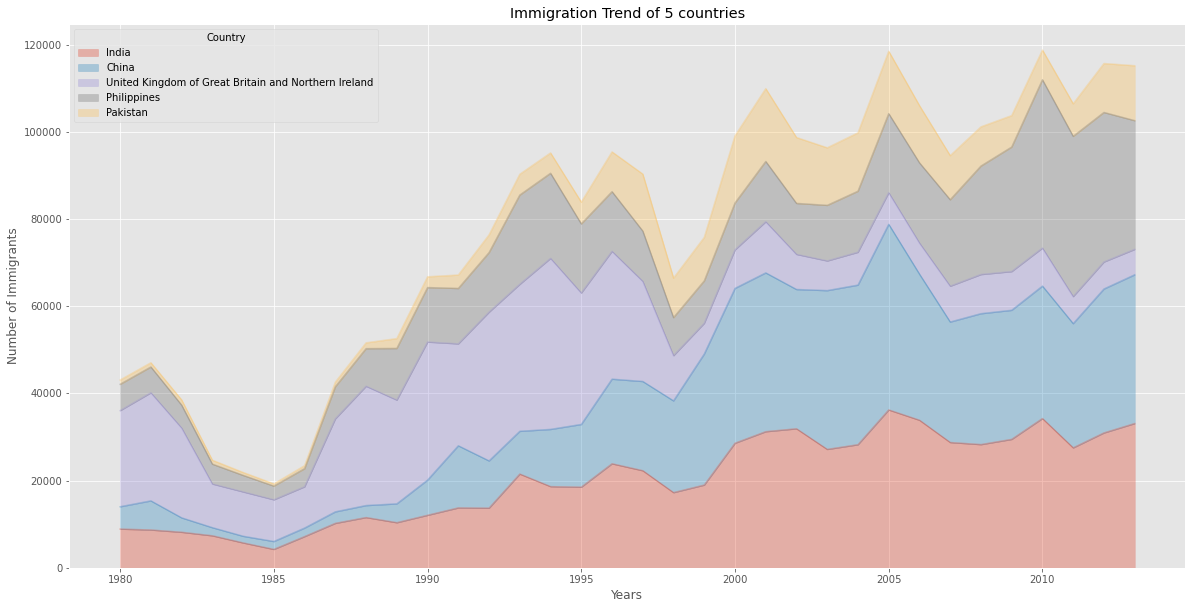

In [29]:
#option2 : using artist layer instead of scripting layer

ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20,10))
ax.set_title('Immigration Trend of 5 countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

### Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

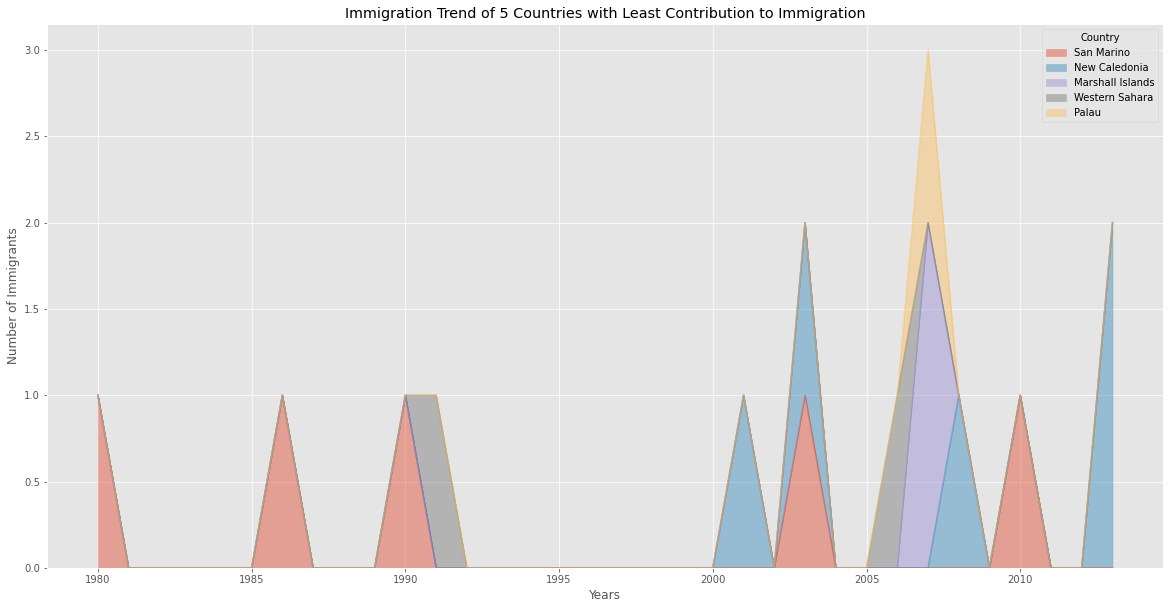

In [30]:
#get the 5 countries with least contribution
df_least5 = df.tail(5)

#transpose the dataframe
df_least5 = df_least5[years].transpose()
df_least5.head()

#let's change the index values of df_least5 to type int for plotting
df_least5.index = df_least5.index.map(int)

df_least5.plot(kind='area', alpha=0.45, figsize=(20,10))
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

Text(0.5, 0, 'Years')

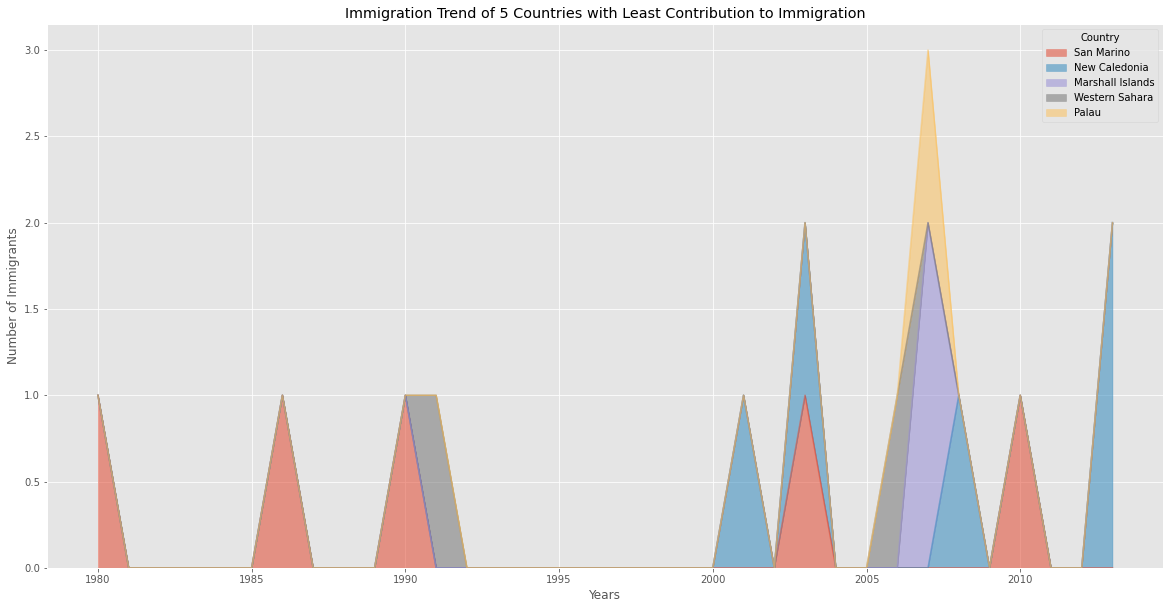

In [32]:
#get the 5 countries with least contribution
df_least5 = df.tail(5)

#transpose the dataframe
df_least5 = df_least5[years].transpose()
df_least5.head()

#let's change the index values of df_least5 to type int for plotting
df_least5.index = df_least5.index.map(int)

ax = df_least5.plot(kind='area', alpha=0.55, figsize=(20,10))
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

## Histograms
A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

#### What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [33]:
#Let's quickly view the 2013 data
df['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [34]:
#np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) #frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


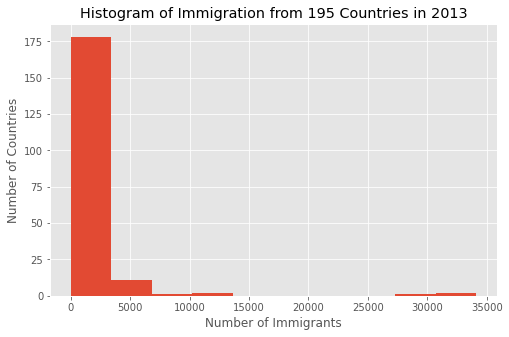

In [35]:
#Now, plotting
df['2013'].plot(kind='hist', figsize=(8,5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

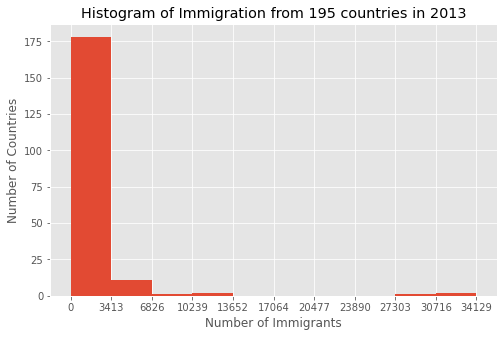

In [37]:
# bin_edges is a list of bin intervals
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

#### Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [38]:
#Let's quickly view the dataset
df.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

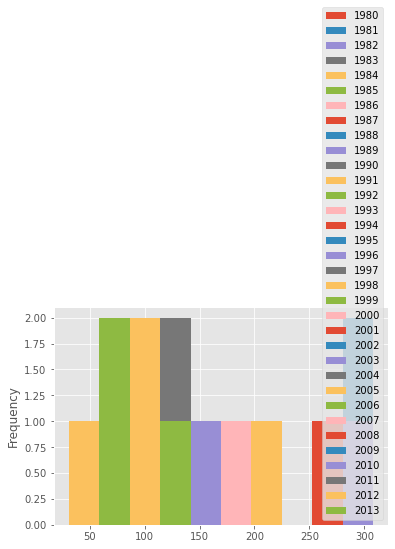

In [39]:
#generate histogram
df.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

That does not look right!

Don't worry, you'll often come across situations like this when creating plots. The solution often lies in how the underlying dataset is structured.

Instead of plotting the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.

In [40]:
#transpose dataframe
data = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
data.head(5)

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


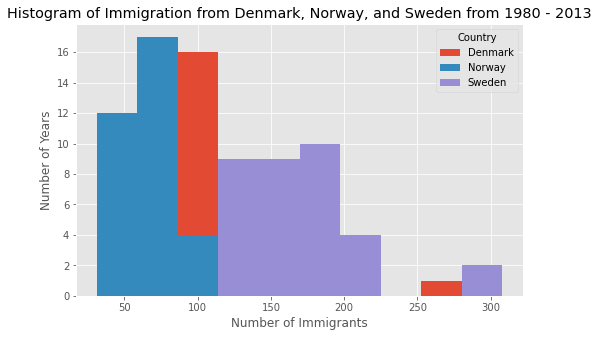

In [41]:
#generate histogram

data.plot(kind='hist', figsize=(8,5))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

- increase the bin size to 15 by passing in bins parameter;
- set transparency to 60% by passing in alpha parameter;
- label the x-axis by passing in x-label parameter;
- change the colors of the plots by passing in color parameter.

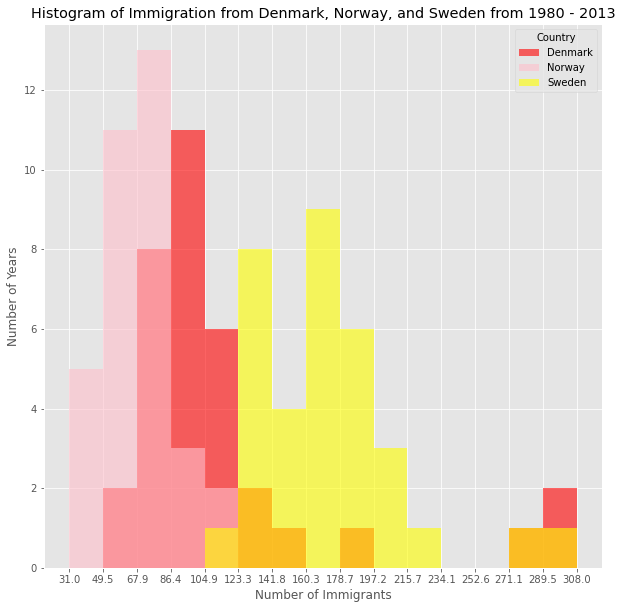

In [46]:
#Let's get the x-tick values
count, bin_edges = np.histogram(data,15)

#unstacked histogram
data.plot(kind='hist',
         figsize=(10,10),
         bins=15,
         alpha=0.6,
         xticks=bin_edges,
         color=['red','pink','yellow']
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

If we do not want the plots to overlap each other, we can stack them using the stacked parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim paramater, as show below.

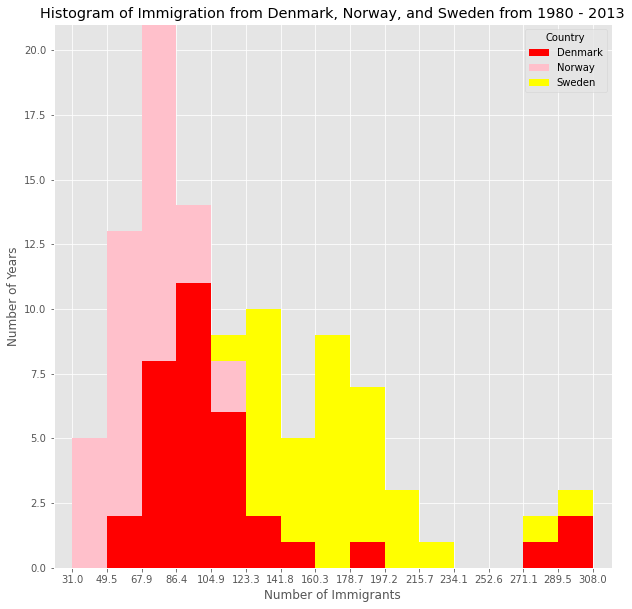

In [49]:
count, bin_edges = np.histogram(data, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

#stacked histogram
data.plot(kind='hist',
         figsize=(10,10),
         bins=15,
         xticks=bin_edges,
         color=['red','pink','yellow'],
         stacked=True,
         xlim=(xmin,xmax)
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

#### Question: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

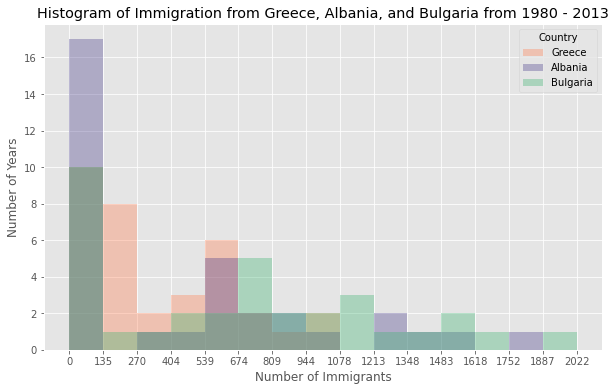

In [50]:
 #The correct answer is:

# create a dataframe of the countries of interest 
data_df = df.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose the dataframe
data_df = data_df.transpose() 

# let's get the x-tick values
count, bin_edges = np.histogram(data_df, 15)

# Un-stacked Histogram
data_df.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
             )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Charts (Dataframe) 
A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via kind parameter in plot():

- kind=bar creates a vertical bar plot
- kind=barh creates a horizontal bar plot

### Vertical bar plot

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

#### Let's start off by analyzing the effect of Iceland's Financial Crisis:

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

#### Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [51]:
data_iceland = df.loc['Iceland', years]
data_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

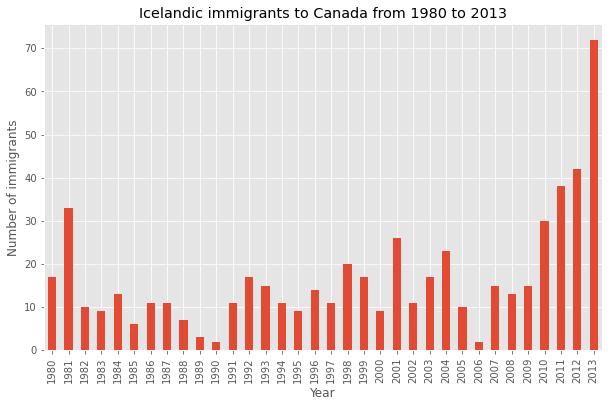

In [52]:
# step 2: plot data
data_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the annotate method of the scripting layer or the pyplot interface. We will pass in the following parameters:

- s: str, the text of annotation.
- xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- arrowprops: Takes a dictionary of properties to draw the arrow:
- arrowstyle: Specifies the arrow style, '->' is standard arrow.
- connectionstyle: Specifies the connection type. arc3 is a straight line.
- color: Specifies color of arrow.
- lw: Specifies the line width.

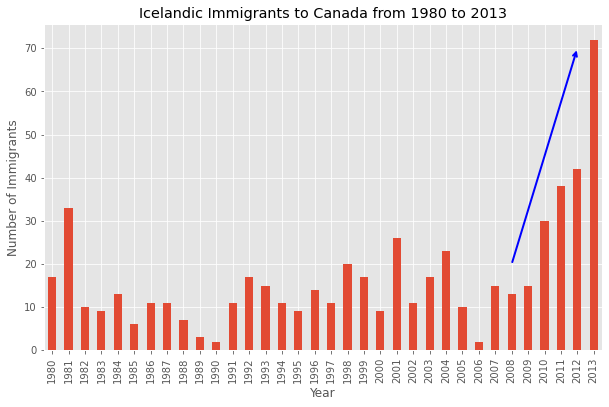

In [54]:
data_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Let's also annotate a text to go over the arrow. We will pass in the following additional parameters:

- rotation: rotation angle of text in degrees (counter clockwise)
- va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

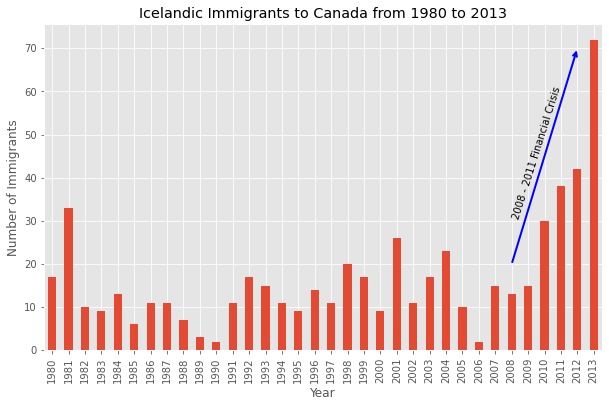

In [55]:
data_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()